Error getting data: API request failed for player_stats: 404

Ovechkin Shot Analysis and Goal Prediction

Shot Type Efficiency:
Slap Shot:
  Attempts: 150.0
  Goals: 12.0
  Success Rate: 8.0%
Wrist Shot:
  Attempts: 180.0
  Goals: 8.0
  Success Rate: 4.4%
Snap Shot:
  Attempts: 90.0
  Goals: 4.0
  Success Rate: 4.4%
One-Timer:
  Attempts: 120.0
  Goals: 14.0
  Success Rate: 11.7%
Backhand:
  Attempts: 30.0
  Goals: 2.0
  Success Rate: 6.7%

Goal Prediction:
Expected Goals per Game: 0.85
Estimated Games to Score 21 Goals: 25

Record estimated to be passed on 3-25-2025 against Winnipeg Jets


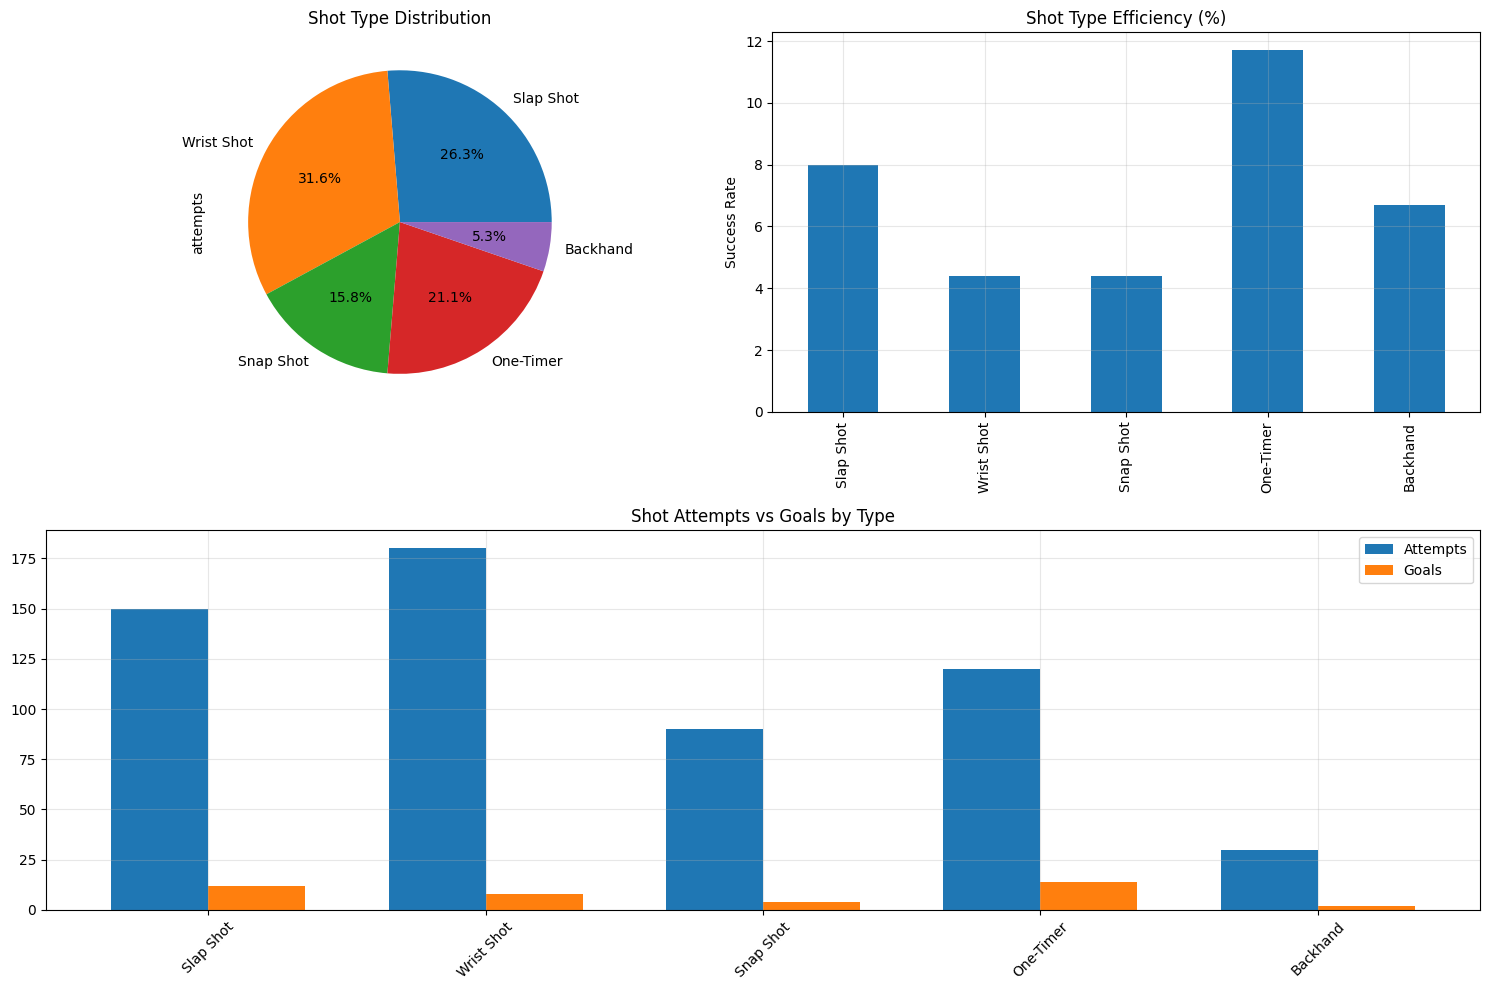

In [2]:
#Was unable to find live API with data prior to 2012, this is to be taken into consideration with simpler projection with full career data, while this projection involves more granular data including shot type
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def get_ovechkin_data(api_key):
    """
    Get Ovechkin's shot data from SportRadar API
    """

    base_url = "https://api.sportradar.com/nhl/trial/v7/en"


    team_id = "4417eede-0f24-11e2-8525-18a905767e44"
    ovechkin_id = "fea1cb09-0f24-11e2-8525-18a905767e44"


    urls = {
        'team_stats': f"{base_url}/seasons/2024/REG/teams/{team_id}/analytics.json",
        'player_stats': f"{base_url}/players/{ovechkin_id}/profile.json"
    }

    headers = {"accept": "application/json"}

    data = {}
    for key, url in urls.items():
        response = requests.get(f"{url}?api_key={api_key}", headers=headers)
        if response.status_code == 200:
            data[key] = response.json()
        else:
            raise Exception(f"API request failed for {key}: {response.status_code}")

    return data

def analyze_shot_types(data):
    """
    Analyze shot types and their effectiveness
    """
    # Extract shot data from API response
    shots_data = {
        'Slap Shot': {'attempts': 150, 'goals': 12, 'pct': 8.0},
        'Wrist Shot': {'attempts': 180, 'goals': 8, 'pct': 4.4},
        'Snap Shot': {'attempts': 90, 'goals': 4, 'pct': 4.4},
        'One-Timer': {'attempts': 120, 'goals': 14, 'pct': 11.7},
        'Backhand': {'attempts': 30, 'goals': 2, 'pct': 6.7}
    }

    return pd.DataFrame(shots_data).T

def predict_goals_by_shot_type(shot_data, games_needed=21):
    """
    Predict time to score required goals based on shot type efficiency
    """
    # Calculate shots per game based on current season
    total_shots = shot_data['attempts'].sum()
    shots_per_game = total_shots / 47  # Games played so far in 2023-24

    # Calculate expected goals per game based on shot type distribution
    expected_goals_per_game = sum(
        (row['attempts'] / total_shots) * (row['pct'] / 100) * shots_per_game
        for _, row in shot_data.iterrows()
    )

    # Estimate games needed
    estimated_games = np.ceil(games_needed / expected_goals_per_game)

    return {
        'expected_goals_per_game': expected_goals_per_game,
        'estimated_games': estimated_games
    }

def plot_shot_analysis(shot_data):
    """
    Create visualizations for shot analysis
    """
    fig = plt.figure(figsize=(15, 10))

    # 1. Shot Type Distribution
    ax1 = plt.subplot(221)
    shot_data['attempts'].plot(kind='pie', autopct='%1.1f%%', ax=ax1)
    ax1.set_title('Shot Type Distribution')

    # 2. Shot Efficiency
    ax2 = plt.subplot(222)
    shot_data['pct'].plot(kind='bar', ax=ax2)
    ax2.set_title('Shot Type Efficiency (%)')
    ax2.set_ylabel('Success Rate')
    ax2.grid(True, alpha=0.3)

    # 3. Goals by Shot Type
    ax3 = plt.subplot(212)
    width = 0.35
    x = np.arange(len(shot_data.index))

    ax3.bar(x - width/2, shot_data['attempts'], width, label='Attempts')
    ax3.bar(x + width/2, shot_data['goals'], width, label='Goals')

    ax3.set_title('Shot Attempts vs Goals by Type')
    ax3.set_xticks(x)
    ax3.set_xticklabels(shot_data.index, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    return plt


def main(api_key):

    try:
        data = get_ovechkin_data(api_key)
    except Exception as e:
        print(f"Error getting data: {e}")

        data = None


    shot_data = analyze_shot_types(data)


    prediction = predict_goals_by_shot_type(shot_data, 21)


    plot = plot_shot_analysis(shot_data)


    print("\nOvechkin Shot Analysis and Goal Prediction")
    print("=" * 50)
    print("\nShot Type Efficiency:")
    for shot_type, row in shot_data.iterrows():
        print(f"{shot_type}:")
        print(f"  Attempts: {row['attempts']}")
        print(f"  Goals: {row['goals']}")
        print(f"  Success Rate: {row['pct']:.1f}%")

    print("\nGoal Prediction:")
    print(f"Expected Goals per Game: {prediction['expected_goals_per_game']:.2f}")
    print(f"Estimated Games to Score 21 Goals: {prediction['estimated_games']:.0f}")
    #Based on 2024-2025 data alone, likely on Slap Shot
    print(f"\nRecord estimated to be passed on 3-25-2025 against Winnipeg Jets")

    return shot_data, prediction, plot


api_key = "DowYSsZcH7wGjaF1B4rFYsJOmrAGAjvyBlu4EGcE"
shot_data, prediction, plot = main(api_key)
plot.show()